In [7]:
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt

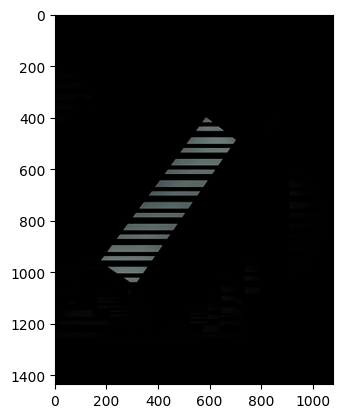

In [8]:
img1_path = 'E:\Project\OOC\LEDs_Data_Processing\LED_Decode\led_image\Led_long_cheo2.jpg'
# img2_path = '2.jpg'
# read and show images
img1 = cv2.imread(img1_path)
# img2 = cv2.imread(img2_path)
# show by matplotlib
# rotate img1 90 degree
img1 = imutils.rotate(img1, -90)
# show by matplotlib
plt.imshow(img1)
plt.show()


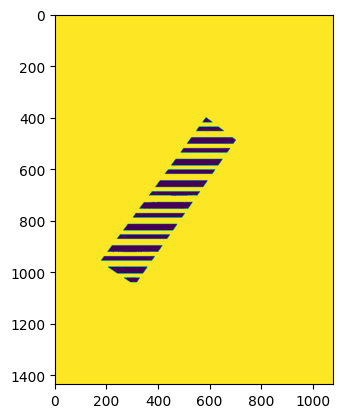

In [9]:
# load the image and convert it to grayscale
image = img1
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# convert to binary image by thresholding it
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV +
                            cv2.THRESH_OTSU)
# show thresholded image
plt.imshow(thresh)
plt.show()

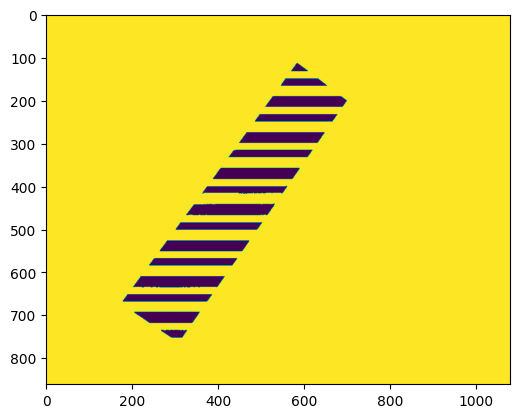

In [10]:
# crop 20% of the image from top and bottom
y = int(image.shape[0] * 0.2)
x = int(image.shape[1] * 0)
crop_img = thresh[y:image.shape[0] - y, x:image.shape[1] - x]
# show cropped image
plt.imshow(crop_img)
plt.show()

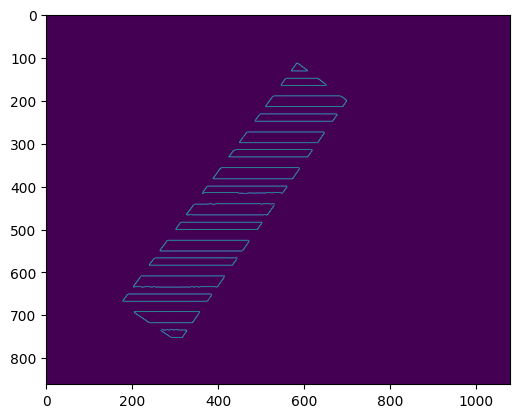

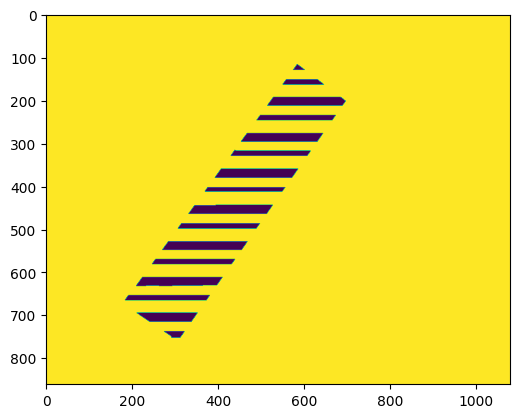

In [11]:
#find edges in the image using canny edge detection method
edges = cv2.Canny(crop_img, 20, 10)
# show result
plt.imshow(edges)
plt.show()
# find lines in the image using hough transform technique
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=100)
# draw lines on the image
for line in lines:
	x1, y1, x2, y2 = line[0]
	cv2.line(crop_img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# show result
plt.imshow(crop_img)
plt.show()


In [12]:
import math

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=70, maxLineGap=100)

for line in lines:
    x1, y1, x2, y2 = line[0]
    theta = math.atan2(y2 - y1, x2 - x1) * 180.0 / math.pi
    print(f"Line: ({x1}, {y1}), ({x2}, {y2}), Angle: {theta}")

Line: (240, 584), (434, 584), Angle: 0.0
Line: (327, 467), (515, 467), Angle: 0.0
Line: (179, 668), (374, 668), Angle: 0.0
Line: (283, 526), (471, 526), Angle: 0.0
Line: (254, 567), (444, 567), Angle: 0.0
Line: (376, 400), (560, 400), Angle: 0.0
Line: (302, 501), (491, 501), Angle: 0.0
Line: (511, 215), (690, 215), Angle: 0.0
Line: (314, 484), (502, 484), Angle: 0.0
Line: (408, 357), (588, 357), Angle: 0.0
Line: (442, 315), (618, 315), Angle: 0.0
Line: (389, 383), (573, 383), Angle: 0.0
Line: (265, 551), (456, 551), Angle: 0.0
Line: (486, 249), (667, 249), Angle: 0.0
Line: (221, 609), (415, 609), Angle: 0.0
Line: (425, 332), (609, 332), Angle: 0.0
Line: (498, 232), (676, 232), Angle: 0.0
Line: (468, 274), (646, 274), Angle: 0.0
Line: (342, 446), (584, 114), Angle: -53.91110647442278
Line: (191, 651), (384, 651), Angle: 0.0
Line: (450, 299), (631, 299), Angle: 0.0
Line: (316, 752), (529, 448), Angle: -54.98268923609507
Line: (530, 190), (684, 190), Angle: 0.0
Line: (205, 692), (357, 692

In [13]:
# get 2 most frequent angle with variation of 10 degrees
most_dict = {}
for line in lines:
    x1, y1, x2, y2 = line[0]
    theta = int(math.atan2(y2 - y1, x2 - x1) * 180.0 / math.pi)
    if theta == 0:
        continue
    if len(list(most_dict.keys())) == 0:
        most_dict[theta] = 1
    for k in list(most_dict.keys()):
            if abs(theta - k) < 10:
                most_dict[k] += 1
            if abs(theta - k) > 10:
                most_dict[theta] = 1
most_dict = sorted(most_dict.items(), key=lambda x: x[1], reverse=True)[:2]
most_dict
# get 1st angle
theta1 = most_dict[0][0]
theta1


-53

In [14]:
if theta1 > 0:
    src_pts = []
else:
    _theta1 = abs(theta1)
    _theta1 = _theta1 * math.pi / 180
    src_pts = np.float32([[10+int(10/math.tan(_theta1)), 10], [50+int(10/math.tan(_theta1)), 10], [10, 20], [50, 20]])
dst_pts = np.float32([[10, 10], [50, 10], [10, 20], [50, 20]])
src_pts

array([[17., 10.],
       [57., 10.],
       [10., 20.],
       [50., 20.]], dtype=float32)

True

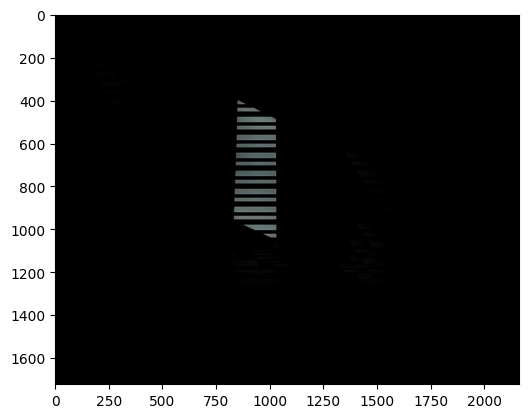

In [15]:
# Get the transformation matrix
matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
# Apply the transformation
warped_img = cv2.warpPerspective(image, matrix, (crop_img.shape[1]*2, crop_img.shape[0]*2))
# show result

plt.imshow(warped_img)
# Save the output
cv2.imwrite('output.jpg', warped_img)